<a href="https://colab.research.google.com/github/A-Midhat/Computer-Vision/blob/main/alimidhat_CV_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 Ali Midhat Abdelgadir Abdalla

##Preparing the files

In [ ]:
!wget https://conradsanderson.id.au/lfwcrop/lfwcrop_color.zip


--2024-10-20 11:43:57--  https://conradsanderson.id.au/lfwcrop/lfwcrop_color.zip
Resolving conradsanderson.id.au (conradsanderson.id.au)... 43.250.142.19, 2400:b800:3:1::1a
Connecting to conradsanderson.id.au (conradsanderson.id.au)|43.250.142.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152404390 (145M) [application/zip]
Saving to: ‘lfwcrop_color.zip’

lfwcrop_color.zip   100%[===================>] 145.34M  26.6MB/s    in 6.7s    

2024-10-20 11:44:05 (21.7 MB/s) - ‘lfwcrop_color.zip’ saved [152404390/152404390]



In [ ]:
!unzip lfwcrop_color.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfwcrop_color/faces/Andre_Agassi_0022.ppm  
  inflating: lfwcrop_color/faces/Kenneth_Bowersox_0001.ppm  
  inflating: lfwcrop_color/faces/Hans_Blix_0012.ppm  
  inflating: lfwcrop_color/faces/Boris_Trajkovski_0001.ppm  
  inflating: lfwcrop_color/faces/Colin_Powell_0063.ppm  
  inflating: lfwcrop_color/faces/Sergio_Garcia_0001.ppm  
  inflating: lfwcrop_color/faces/Otto_Reich_0001.ppm  
  inflating: lfwcrop_color/faces/Tony_Elias_0001.ppm  
  inflating: lfwcrop_color/faces/Hosni_Mubarak_0004.ppm  
  inflating: lfwcrop_color/faces/Misty_Dawn_Clymer_0001.ppm  
  inflating: lfwcrop_color/faces/Heidi_Klum_0002.ppm  
  inflating: lfwcrop_color/faces/Roh_Moo-hyun_0026.ppm  
  inflating: lfwcrop_color/faces/Larry_Tanenbaum_0001.ppm  
  inflating: lfwcrop_color/faces/Kate_Winslet_0004.ppm  
  inflating: lfwcrop_color/faces/George_W_Bush_0519.ppm  
  inflating: lfwcrop_color/faces/Kurt_Russell_0002.ppm  
  inflating: lfwcrop_color/

##importing required libraries

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


##Reading Images
since the dataset cannot be read using panads, so im using PIL (pillow) to read the images and converti it into numpy array and add it to a list so that i can later use it to my FCN model.

In [ ]:
def load_images(path):
  images = []
  for filename in os.listdir(path):
    if filename.endswith(".ppm"): # since all images are in .ppm format
      img_path = os.path.join(path, filename) #concatenates the filename (.ppm) to the dir of the files
      img = Image.open(img_path)
      images.append(np.array(img))
  return np.array(images)

##Image sizes and numbers :
the image set returned a value of (13233, 64, 64, 3), which means there 13,233 image with size 64 by 64.

In [ ]:
images_set = load_images("/content/lfwcrop_color/faces")
images_set.shape

(13233, 64, 64, 3)

array([[[ 77,  51,  31],
        [ 72,  45,  24],
        [ 79,  49,  28],
        ...,
        [103,  50,  32],
        [ 92,  43,  23],
        [ 84,  40,  18]],

       [[ 69,  43,  25],
        [ 67,  40,  20],
        [ 80,  50,  29],
        ...,
        [108,  53,  36],
        [ 95,  45,  25],
        [ 85,  40,  18]],

       [[ 62,  37,  20],
        [ 66,  37,  19],
        [ 85,  51,  32],
        ...,
        [113,  58,  40],
        [ 99,  49,  30],
        [ 89,  42,  21]],

       ...,

       [[161, 113, 106],
        [158, 113, 101],
        [152, 109,  93],
        ...,
        [  1,  46, 127],
        [  3,  45, 124],
        [  3,  43, 121]],

       [[161, 112, 106],
        [158, 113, 101],
        [153, 110,  94],
        ...,
        [  2,  45, 124],
        [  2,  44, 121],
        [  1,  43, 118]],

       [[161, 111, 105],
        [159, 113, 103],
        [153, 109,  95],
        ...,
        [  2,  45, 121],
        [  2,  43, 118],
        [  1,  43, 117]]], dtype=uint8)
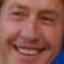

In [ ]:
images_set[0]

##Sample clean images
Displaying the first five images

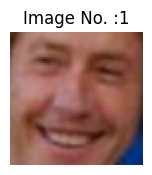

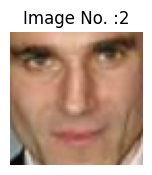

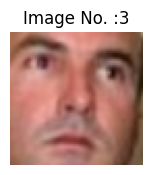

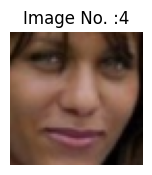

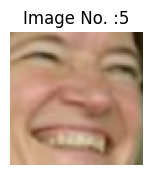

In [ ]:

for i in range(5):
  plt.figure(figsize=(10,10))
  plt.subplot(5,1, i+1)
  plt.title(f"Image No. :{i+1}")
  plt.axis(False)
  plt.imshow(images_set[i])
  plt.show()

##Adding the gaussian noise function

In [ ]:
def adding_noise(image, std):
  noise_std = std*255
  gaussian_noise = np.random.normal(0, noise_std, image.shape)
  noisy_image = image + gaussian_noise
  noisy_image = np.clip(noisy_image, 0, 255) #needed for clipping values larger than 255
  return noisy_image.astype(np.uint8) # converts the numpy array back into unsigned integrs (0,255) pixel values

##displaying the first 5 noisy images

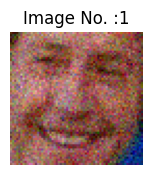

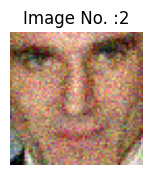

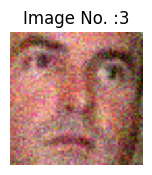

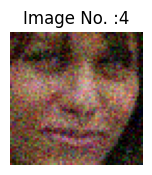

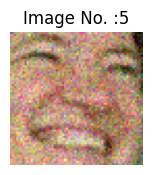

In [ ]:
for i in range(5):
  plt.figure(figsize=(10,10))
  clean_img = images_set[i]
  noisy_img = adding_noise(clean_img, 0.1)
  plt.subplot(5,1, i+1)
  plt.title(f"Image No. :{i+1}")
  plt.axis(False)
  plt.imshow(noisy_img)
  plt.show()

##Splitting the data
train 70%, validation 20%, test 10%
No need to shuffle the dataset.

In [ ]:
def split(image_dataset): #images_set
  total_size = len(image_dataset)
  train_size = int(0.7*total_size)
  val_size = int(0.2*total_size)
  test_size = int(0.1*total_size)

  train_set = image_dataset[:train_size]
  val_set = image_dataset[train_size:train_size+val_size]
  test_set = image_dataset[train_size+val_size:]

  return train_set, val_set, test_set


In [ ]:
clean_train, clean_val, clean_test = split(images_set)
print(len(clean_train), len(clean_val), len(clean_test))


9263 2646 1324


##Adding noises to the sets
so i can have 6 sets each set rrepresenting the (x,y) of the model, where x is the noisy set and y is the clean set as a target.

In [ ]:
noisy_train =  [adding_noise(img, 0.1) for img in clean_train]
noisy_val = [adding_noise(img, 0.1) for img in clean_val]
noisy_test = [adding_noise(img, 0.1) for img in clean_test]


##Building the autoencoder

In [ ]:
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Conv2DTranspose
from keras.models import Sequential


In [ ]:

model = Sequential([
    #Encoder part
    Conv2D(64, kernel_size=(3,3), activation="relu", padding='same', input_shape=(64,64,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
    # MaxPool2D(pool_size=(2,2)),

    #Decoder part
    # UpSampling2D(size=(2,2)),
    Conv2DTranspose(64, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D(size=(2,2)),
    Conv2DTranspose(64, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D(size=(2,2)),
    Conv2DTranspose(64, kernel_size=(3,3), activation='sigmoid', padding='same'),
    # output layer
    Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')  # Output 3 channels for RGB

])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 3)           │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,163 (735.01 KB)

 Trainable params: 188,163 (735.01 KB)

 Non-trainable params: 0 (0.00 B)

##Normalization of the dataset

In [ ]:
clean_train, noisy_train = np.array(clean_train), np.array(noisy_train)
clean_val, noisy_val = np.array(clean_val), np.array(noisy_val)
clean_test, noisy_test = np.array(clean_test), np.array(noisy_test)

norm_clean_train = clean_train.astype(np.float32) / 255.0
norm_noisy_train = noisy_train.astype(np.float32) / 255.0
norm_clean_val = clean_val.astype(np.float32) / 255.0
norm_noisy_val = noisy_val.astype(np.float32) / 255.0
norm_clean_test = clean_test.astype(np.float32) / 255.0
norm_noisy_test = noisy_test.astype(np.float32) / 255.0

##Training the Model

In [ ]:
model.compile(optimizer="adam",
              loss="mse")

**<font color="red">A brief explanation of the choice of model architecture and loss function used would be nice.</font>**

In [ ]:
train_results = model.fit(x=norm_noisy_train, y=norm_clean_train,batch_size=64, epochs=10)


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0235
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0029
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0019
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0016
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0014
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0013
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0013
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0013
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0012
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0011


In [ ]:
predictions = model.predict(norm_noisy_test)
predictions[0]

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([[[0.7451946 , 0.6069183 , 0.56748545],
        [0.80953705, 0.6666091 , 0.57464534],
        [0.81235474, 0.6554499 , 0.55695057],
        ...,
        [0.8139695 , 0.63899755, 0.5074972 ],
        [0.81084085, 0.64134973, 0.5215359 ],
        [0.779535  , 0.6007266 , 0.4777628 ]],

       [[0.8032142 , 0.68693405, 0.57455623],
        [0.84507406, 0.7076226 , 0.5904287 ],
        [0.8298044 , 0.66818243, 0.55830836],
        ...,
        [0.8215218 , 0.6434291 , 0.48845336],
        [0.83232325, 0.66859657, 0.50433296],
        [0.8158235 , 0.6493354 , 0.4874214 ]],

       [[0.78886837, 0.6582613 , 0.5586524 ],
        [0.8244974 , 0.6778483 , 0.5607731 ],
        [0.804916  , 0.64003986, 0.5336776 ],
        ...,
        [0.81138635, 0.6406074 , 0.49241772],
        [0.83161116, 0.66474205, 0.50653064],
        [0.8270458 , 0.66176176, 0.5027789 ]],

       ...,

       [[0.2067093 , 0.16753313, 0.1343157 ],
        [0.20920119, 0.15683582, 0.10655035],
        [0.22695503, 0

##Comparing Results, between the predicted clean image and the noisy test image

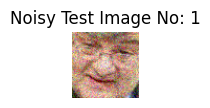

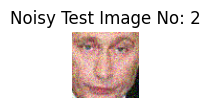

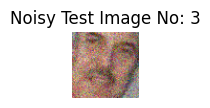

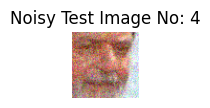

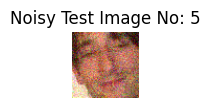

In [ ]:
for i in range(5):
  plt.figure(figsize=(5,5))
  plt.subplot(5,1,i+1)
  image_to_show = (norm_noisy_test[i] * 255).astype(np.uint8)
  plt.imshow(image_to_show)
  plt.title(f"Noisy Test Image No: {i+1}")
  plt.axis(False)
  plt.show()

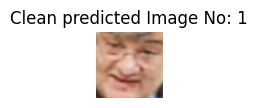

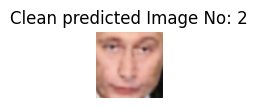

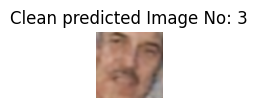

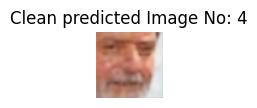

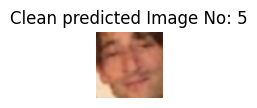

In [ ]:
for i in range(5):
  plt.figure(figsize=(5,5))
  plt.subplot(5,1,i+1)
  image_to_show = (predictions[i] * 255).astype(np.uint8)
  plt.imshow(image_to_show)
  plt.title(f"Clean predicted Image No: {i+1}")
  plt.axis(False)
  plt.show()

**<font color="red">Good results! What do we conclude from these results?</font>**

#Part 2 (...)

##Downloading kerasCV

im using this tutorial to code https://keras.io/guides/keras_cv/object_detection_keras_cv/


In [ ]:
!pip install --upgrade git+https://github.com/keras-team/keras-cv -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.3 MB/s eta 0:00:00


In [ ]:

import os
import matplotlib.pyplot as plt
import keras
import keras_cv
import numpy as np
from keras_cv import bounding_box,visualization
import os

import tqdm


##Initializing the pretrained model
which is YOLO verion 8, and bounding box type of xywh

In [ ]:
yolo_v8 = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc", bounding_box_format="xywh"
)

100%|██████████| 2.27k/2.27k [00:00<00:00, 4.03MB/s]


100%|██████████| 99.5M/99.5M [00:02<00:00, 43.1MB/s]


## Reading files from drive
which are images and YOLO data foramt which holds the class_id and x , y , w, h in text format

In [ ]:
#/content/drive/MyDrive/cow.jfif
#/content/drive/MyDrive/dog.jfif
#/content/drive/MyDrive/people.jfif
cow_img = "/content/drive/MyDrive/cow.jfif"
cow_bb = "/content/drive/MyDrive/cows.txt"

dog_img = "/content/drive/MyDrive/dog.jfif"
do_bb = "/content/drive/MyDrive/dog.txt"

people_img = "/content/drive/MyDrive/people.jfif"
people_bb = "/content/drive/MyDrive/people.txt"

In [ ]:
filepath = keras.utils.get_file(origin=people_img)
image = np.array(filepath)
visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0,255),
    rows=1,
    cols=1,
    scale=5,
)


##Resizing images
Since YOLO was trained on a 640 by 640 images, resizing is needed.

In [ ]:
image_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)


In [ ]:
image_batch = inference_resizing([image])

##Mapping all classes
my interset is in class_mapping[9], class_mapping[11], and class_mapping[14], which are Cow, Dog, and Person repectivly.

In [ ]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids)) # which returns a dictionary where every class is numerized from 0 to len(class_ids)-1

##Detecting the object


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


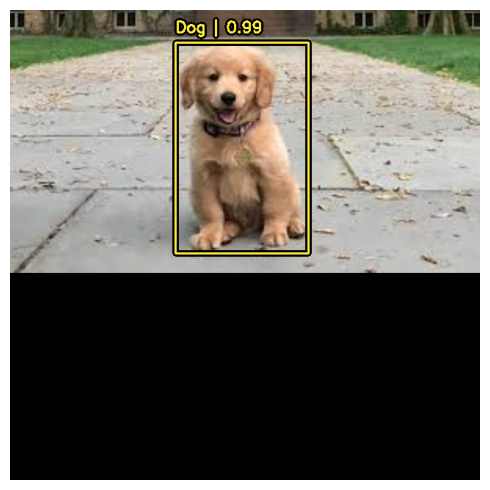

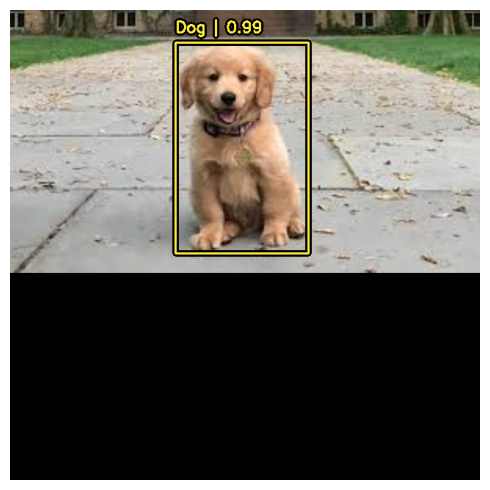

In [ ]:
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)